<a href="https://colab.research.google.com/github/aime-n/movie-recommendation/blob/main/teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
user = pd.read_csv('ml-100k/u.user', sep='|',
                      encoding='latin-1', names=['userId', 'age', 'gender', 'occupation', 'zipcode'])
user

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [35]:
item = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',
                    names=['movieId', 'movieName','releaseDate', 'naoSei', 'imbdLink',
                    'unknown', 'Action', 'Adventure', 'Animation', "Children's",
                    'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                    'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                    'War', 'Western'])
item

,movieId,movieName,releaseDate,naoSei,imbdLink,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = pd.read_csv('ml-100k/u.data', sep='\t', names=['userId', 'movieId', 'ratings', 'timestamp'])
data

,userId,movieId,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [7]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970
# == unix time
ts0 = data['timestamp'][0]
from datetime import datetime
ts0
datetime.utcfromtimestamp(881250949).strftime('%Y-%m-%d')

'1997-12-04'

In [8]:
def convert_unix(cell):
  new_time = datetime.utcfromtimestamp(int(cell)).strftime('%Y-%m-%d')
  return new_time  

In [104]:
from pandas.io.formats.format import DataFrameFormatter
data['timestamp'] = [convert_unix(cell) for cell in data['timestamp']]
data

,userId,movieId,ratings,timestamp
0,196,242,3,1997-12-04
1,186,302,3,1998-04-04
2,22,377,1,1997-11-07
3,244,51,2,1997-11-27
4,166,346,1,1998-02-02
...,...,...,...,...
99995,880,476,3,1997-11-22
99996,716,204,5,1997-11-17
99997,276,1090,1,1997-09-20
99998,13,225,2,1997-12-17


In [9]:
data.isnull().any()

userId       False
movieId      False
ratings      False
timestamp    False
dtype: bool

In [30]:
genre = pd.read_csv('ml-100k/u.genre', names=['genre', 'code'], sep='|')
genre

,genre,code
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [34]:
genre.genre.unique(

array(['unknown', 'Action', 'Adventure', 'Animation', "Children's",
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'], dtype=object)

In [12]:
pd.read_csv('ml-100k/u.info', header=None)

,0
0,943 users
1,1682 items
2,100000 ratings


In [13]:
pd.read_csv('ml-100k/u.occupation', names=['occupation'])

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


# Tentativa de grafo

In [14]:
import networkx as nx

In [15]:
data.columns

Index(['userId', 'movieId', 'ratings', 'timestamp'], dtype='object')

In [45]:
print(item.movieId)
print(item.movieName)

0          1
1          2
2          3
3          4
4          5
        ... 
1677    1678
1678    1679
1679    1680
1680    1681
1681    1682
Name: movieId, Length: 1682, dtype: int64
0                                Toy Story (1995)
1                                GoldenEye (1995)
2                               Four Rooms (1995)
3                               Get Shorty (1995)
4                                  Copycat (1995)
                          ...                    
1677                            Mat' i syn (1997)
1678                             B. Monkey (1998)
1679                         Sliding Doors (1998)
1680                          You So Crazy (1994)
1681    Scream of Stone (Schrei aus Stein) (1991)
Name: movieName, Length: 1682, dtype: object


In [46]:
index_movieName = item.movieName
item.movieId == index_movieName.index 

0       False
1       False
2       False
3       False
4       False
        ...  
1677    False
1678    False
1679    False
1680    False
1681    False
Length: 1682, dtype: bool

In [55]:
index_movieName = [i for i in item.movieName.index]

In [39]:
data.movieId

0         242
1         302
2         377
3          51
4         346
         ... 
99995     476
99996     204
99997    1090
99998     225
99999     203
Name: movieId, Length: 100000, dtype: int64

In [16]:
data['userId'] = ['u'+str(u) for u in data['userId']]
(data.head())

,userId,movieId,ratings,timestamp
0,u196,242,3,881250949
1,u186,302,3,891717742
2,u22,377,1,878887116
3,u244,51,2,880606923
4,u166,346,1,886397596


In [17]:
user['userId'] = ['u'+str(u) for u in user['userId']]
user.head()

,userId,age,gender,occupation,zipcode
0,u1,24,M,technician,85711
1,u2,53,F,other,94043
2,u3,23,M,writer,32067
3,u4,24,M,technician,43537
4,u5,33,F,other,15213


## grafo bipartido com peso
userId ----rating----> movieId

In [25]:
[('user'+str(x),'movieId'+str(y),z) for x,y,z in data[['userId', 'movieId', 'ratings']].to_numpy()][0]

('useru196', 'movieId242', 3)

In [19]:
def user_movie_rating():
  # u = userId, m=movieId, r=ratings==weight
  l = [(u,m,r) for u,m,r in data[['userId', 'movieId', 'ratings']].to_numpy()]
  return l

In [20]:
list(user_movie_rating())[:10]

[('u196', 242, 3),
 ('u186', 302, 3),
 ('u22', 377, 1),
 ('u244', 51, 2),
 ('u166', 346, 1),
 ('u298', 474, 4),
 ('u115', 265, 2),
 ('u253', 465, 5),
 ('u305', 451, 3),
 ('u6', 86, 3)]

In [21]:
data.userId

0        u196
1        u186
2         u22
3        u244
4        u166
         ... 
99995    u880
99996    u716
99997    u276
99998     u13
99999     u12
Name: userId, Length: 100000, dtype: object

In [22]:
from networkx.algorithms import bipartite

G = nx.Graph()

G.add_nodes_from([u for u,m,r in user_movie_rating()], bipartite=0)
G.add_nodes_from([m for u,m,r in user_movie_rating()], bipartite=1)

G.add_weighted_edges_from(user_movie_rating())

In [23]:
print(nx.info(G))

Graph with 2625 nodes and 100000 edges


/tmp/ipykernel_28097/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [24]:
G.nodes()

NodeView(('u196', 'u186', 'u22', 'u244', 'u166', 'u298', 'u115', 'u253', 'u305', 'u6', 'u62', 'u286', 'u200', 'u210', 'u224', 'u303', 'u122', 'u194', 'u291', 'u234', 'u119', 'u167', 'u299', 'u308', 'u95', 'u38', 'u102', 'u63', 'u160', 'u50', 'u301', 'u225', 'u290', 'u97', 'u157', 'u181', 'u278', 'u276', 'u7', 'u10', 'u284', 'u201', 'u287', 'u246', 'u242', 'u249', 'u99', 'u178', 'u251', 'u81', 'u260', 'u25', 'u59', 'u72', 'u87', 'u42', 'u292', 'u20', 'u13', 'u138', 'u60', 'u57', 'u223', 'u189', 'u243', 'u92', 'u241', 'u254', 'u293', 'u127', 'u222', 'u267', 'u11', 'u8', 'u162', 'u279', 'u145', 'u28', 'u135', 'u32', 'u90', 'u216', 'u250', 'u271', 'u265', 'u198', 'u168', 'u110', 'u58', 'u237', 'u94', 'u128', 'u44', 'u264', 'u41', 'u82', 'u262', 'u174', 'u43', 'u84', 'u269', 'u259', 'u85', 'u213', 'u121', 'u49', 'u155', 'u68', 'u172', 'u19', 'u268', 'u5', 'u80', 'u66', 'u18', 'u26', 'u130', 'u256', 'u1', 'u56', 'u15', 'u207', 'u232', 'u52', 'u161', 'u148', 'u125', 'u83', 'u272', 'u151', 'u5

In [130]:
color_map = []
for node in G.nodes:
  if str(node).startswith('u'):
    color_map.append('yellow')
  else:
    color_map.append('green')

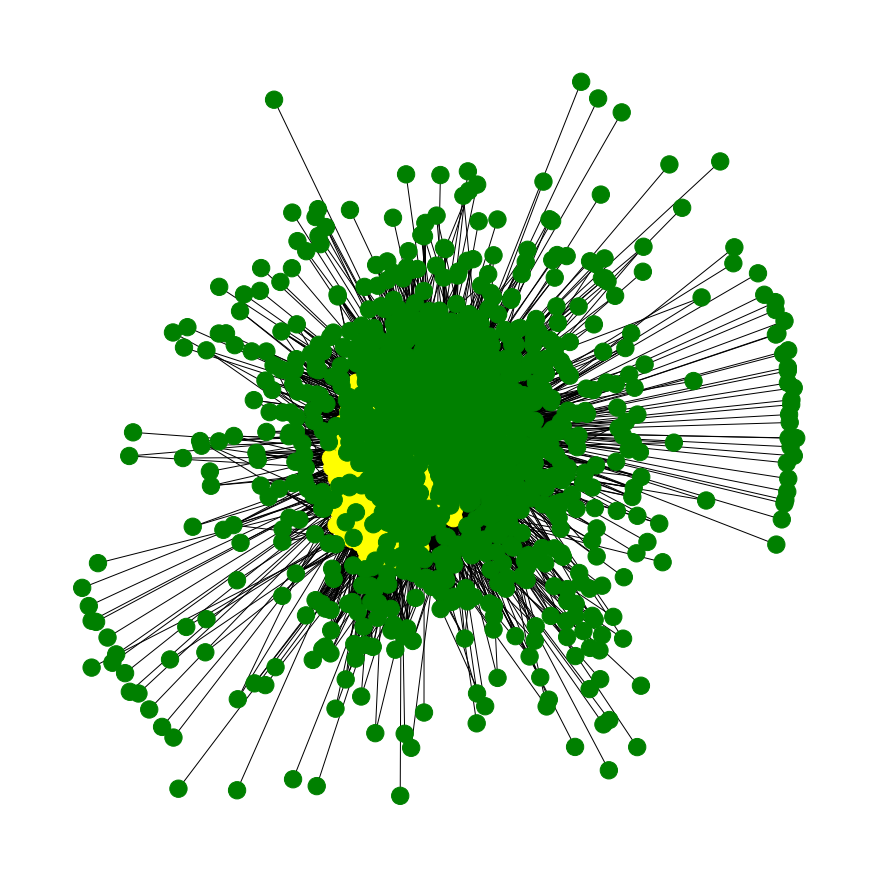

In [131]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
plt.figure(3,figsize=(12,12))
nx.draw(G,pos,node_color=color_map)
plt.show()

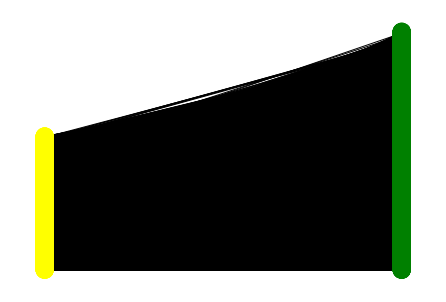

In [132]:
X, Y = bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, node_color=color_map)
plt.show()

In [133]:
nx.algorithms.bipartite

<module 'networkx.algorithms.bipartite' from '/usr/local/lib/python3.7/dist-packages/networkx/algorithms/bipartite/__init__.py'>

## Usando todas informações como nodes e conectadas pelas suas relações



In [134]:
len(user['userId'])

943

In [135]:
len(data['movieId'])

100000

In [136]:
data['movieId'].max()

1682

In [137]:
1682+943

2625

In [138]:
G = nx.Graph()

G.add_nodes_from(user['userId'])
# G.add_nodes_from(user['gender'])
# G.add_nodes_from(user['age']) 
# G.add_nodes_from(user['occupation']) 

# occupation, gender and and can be attributes of userId
nx.set_node_attributes(G, user['age'], "age")
nx.set_node_attributes(G, user['occupation'], "ocupation")
G.add_nodes_from(data['movieId'])
nx.set_node_attributes(G, user['gender'], "gender")

G.add_nodes_from(data['movieId'])

G.add_weighted_edges_from(user_movie_rating())

In [139]:
(G.nodes(data=True))

NodeDataView({'u1': {}, 'u2': {}, 'u3': {}, 'u4': {}, 'u5': {}, 'u6': {}, 'u7': {}, 'u8': {}, 'u9': {}, 'u10': {}, 'u11': {}, 'u12': {}, 'u13': {}, 'u14': {}, 'u15': {}, 'u16': {}, 'u17': {}, 'u18': {}, 'u19': {}, 'u20': {}, 'u21': {}, 'u22': {}, 'u23': {}, 'u24': {}, 'u25': {}, 'u26': {}, 'u27': {}, 'u28': {}, 'u29': {}, 'u30': {}, 'u31': {}, 'u32': {}, 'u33': {}, 'u34': {}, 'u35': {}, 'u36': {}, 'u37': {}, 'u38': {}, 'u39': {}, 'u40': {}, 'u41': {}, 'u42': {}, 'u43': {}, 'u44': {}, 'u45': {}, 'u46': {}, 'u47': {}, 'u48': {}, 'u49': {}, 'u50': {}, 'u51': {}, 'u52': {}, 'u53': {}, 'u54': {}, 'u55': {}, 'u56': {}, 'u57': {}, 'u58': {}, 'u59': {}, 'u60': {}, 'u61': {}, 'u62': {}, 'u63': {}, 'u64': {}, 'u65': {}, 'u66': {}, 'u67': {}, 'u68': {}, 'u69': {}, 'u70': {}, 'u71': {}, 'u72': {}, 'u73': {}, 'u74': {}, 'u75': {}, 'u76': {}, 'u77': {}, 'u78': {}, 'u79': {}, 'u80': {}, 'u81': {}, 'u82': {}, 'u83': {}, 'u84': {}, 'u85': {}, 'u86': {}, 'u87': {}, 'u88': {}, 'u89': {}, 'u90': {}, 'u91'

In [140]:
G.number_of_nodes()

2625

In [143]:
G.number_of_edges()

100000

In [141]:
print(data.shape)
print(user.shape)

(100000, 4)
(943, 5)


In [142]:
G.nodes()

NodeView(('u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u12', 'u13', 'u14', 'u15', 'u16', 'u17', 'u18', 'u19', 'u20', 'u21', 'u22', 'u23', 'u24', 'u25', 'u26', 'u27', 'u28', 'u29', 'u30', 'u31', 'u32', 'u33', 'u34', 'u35', 'u36', 'u37', 'u38', 'u39', 'u40', 'u41', 'u42', 'u43', 'u44', 'u45', 'u46', 'u47', 'u48', 'u49', 'u50', 'u51', 'u52', 'u53', 'u54', 'u55', 'u56', 'u57', 'u58', 'u59', 'u60', 'u61', 'u62', 'u63', 'u64', 'u65', 'u66', 'u67', 'u68', 'u69', 'u70', 'u71', 'u72', 'u73', 'u74', 'u75', 'u76', 'u77', 'u78', 'u79', 'u80', 'u81', 'u82', 'u83', 'u84', 'u85', 'u86', 'u87', 'u88', 'u89', 'u90', 'u91', 'u92', 'u93', 'u94', 'u95', 'u96', 'u97', 'u98', 'u99', 'u100', 'u101', 'u102', 'u103', 'u104', 'u105', 'u106', 'u107', 'u108', 'u109', 'u110', 'u111', 'u112', 'u113', 'u114', 'u115', 'u116', 'u117', 'u118', 'u119', 'u120', 'u121', 'u122', 'u123', 'u124', 'u125', 'u126', 'u127', 'u128', 'u129', 'u130', 'u131', 'u132', 'u133', 'u134', 'u135', 'u136', 'u137', 'u